10.62707842300343
0.7856033739097096
2.750398656952514
0.340475843692972


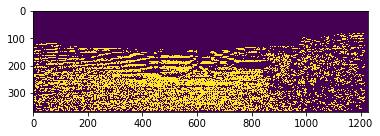

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def read_flow(path):
    read_image = cv2.imread(path, -1)
#     print(read_image)
#     plt.imshow(read_image)
    flow_u = (read_image[:, :, 2] - 2. ** 15) / 64
    flow_v = (read_image[:, :, 1] - 2. ** 15) / 64
    flow_valid = read_image[:, :, 0]

    flow_final = np.transpose(np.array([flow_u, flow_v, flow_valid]), axes=[1, 2, 0])
#     plt.imshow(flow_valid)
    plt.figure(1)
    plt.imshow(flow_final)
    plt.savefig('results/Opflow_estimation.png') 
    plt.show()

    return flow_final


def flow_error(flow_est,flow_gt):
    error_u = flow_gt[:, :, 0] - flow_est[:, :, 0]
    error_v = flow_gt[:, :, 1] - flow_est[:, :, 1]
    error_final = np.sqrt(error_u ** 2 + error_v ** 2)

    flow_gt_valid = flow_gt[:, :, 2]
    error_final[flow_gt_valid == 0] = 0

    return (error_final, flow_gt_valid)


def plot_Opflow_error(Opflow_error, Opflow_gt, bins = 20):
    valid_gt = Opflow_gt[:, :, 2]
    plt.figure()
    plt.hist(Opflow_error[valid_gt != 0], bins=bins, density=True)
    plt.title('Density of Optical Flow Error')
    plt.xlabel('Optical Flow error')
    plt.ylabel('The Percentage of Pixels')
    plt.savefig('results/Opflow_error_2.png')
    plt.show()


est_path = ["./results_opticalflow_kitti/results/LKflow_000045_10.png","./results_opticalflow_kitti/results/LKflow_000157_10.png"]  # '000157','000045'
gt_path = ["./data_stereo_flow/training/flow_noc/000045_10.png","./data_stereo_flow/training/flow_noc/000157_10.png"]


for (e,g) in zip(est_path,gt_path):
    # Read flow images
    flow_est = read_flow(e)
    flow_gt = read_flow(g)
#     print(flow_est)

    # Compute the error    
    (error_final, flow_gt_valid) = flow_error(flow_est, flow_gt)

    msen = np.mean(error_final[flow_gt_valid != 0])
    print(msen)
    pepn = (np.sum(error_final[flow_gt_valid != 0] > 3)/len(error_final[flow_gt_valid != 0]))
    print(pepn)
    
#     plt.imshow(flow_est.astype('uint8'))
#     plt.axis('off') # 不显示坐标轴
#     plt.show()
    
#     path = "./data_stereo_flow/training/image_0/000045_10.png"
#     read_image = cv2.imread(path, -1)
#     plt.imshow(read_image, cmap='gray')
# plt.imshow(E,cmap='rainbow',alpha=.5)
#     plt.imshow(ndimage.grey_dilation(E, size=(3, 3)), cmap='rainbow', alpha=.5)
    plot_Opflow_error(error_final, flow_gt, bins=100)
